# Generative Adversarial Networks (GANs)

## Advantages

- Generative rather than discrimitive models.
- Create images, text, music, etc.

## Disadvantages

- Similar to most other deep learning models.

## References

1. Generative Deep Learning, by David Foster.
1. GANs in Action, by Jakub Langr & Vladimir Bok

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [2]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)

z_dim = 100

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

## Generator Model Implementation

In [4]:
def build_generator(img_shape, z_dim):
    
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(128, input_dim=z_dim),
            tf.keras.layers.LeakyReLU(alpha=0.01),
            tf.keras.layers.Dense(28 * 28 * 1, activation='tanh'),
            tf.keras.layers.Reshape(img_shape)
        ]
    )

    return model

## Dicriminator Model Implementation

In [5]:
def build_descriminator(img_shape):
    
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=img_shape),
            tf.keras.layers.Dense(128),
            tf.keras.layers.LeakyReLU(alpha=0.01),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ]
    )

    return model

## Building and Compiling the GAN Model

In [6]:
def build_gan(generator, descriminator):
    
    model = tf.keras.models.Sequential(
        [
            generator,
            descriminator
        ]
    )

    return model

In [7]:
discriminator = build_descriminator(img_shape)
discriminator.compile(
    loss='binary_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['Accuracy']
    )
discriminator.trainable = False

In [8]:
generator = build_generator(img_shape, z_dim)

In [9]:
gan = build_gan(generator, discriminator)
gan.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam()
    )

## Output for Generated Digits

In [10]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)

    gen_imgs = 0.5 * gen_imgs + 0.5

    _, axs = plt.subplots(
        image_grid_rows,
        image_grid_columns,
        figsize=(4,4),
        sharey=True,
        sharex=True
        )

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1

## Training

In [11]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):
    
    (X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_train = (X_train - 127.5) / 127.5

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:

            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

        print(f'{iteration + 1} [D loss: {d_loss}, acc.: {100.0 * accuracy:.2f}] [G loss: {g_loss}]')

    sample_images(generator)

## Running the Model

1 [D loss: 0.623692512512207, acc.: 0.00] [G loss: 0.941602349281311]
2 [D loss: 0.4414524305029772, acc.: 0.00] [G loss: 0.6991006731987]
3 [D loss: 0.5793417973545729, acc.: 0.00] [G loss: 0.5456627011299133]
4 [D loss: 0.7253451677056546, acc.: 0.00] [G loss: 0.3986318111419678]
5 [D loss: 0.8268981146352417, acc.: 0.00] [G loss: 0.33321356773376465]
6 [D loss: 0.9125594159447701, acc.: 3.52] [G loss: 0.31158435344696045]
7 [D loss: 0.8932190253825638, acc.: 3.52] [G loss: 0.3257380723953247]
8 [D loss: 0.835523362291724, acc.: 0.39] [G loss: 0.39638417959213257]
9 [D loss: 0.7258538198566384, acc.: 0.00] [G loss: 0.5341705083847046]
10 [D loss: 0.584485752857745, acc.: 0.00] [G loss: 0.7258564829826355]
11 [D loss: 0.41498618449077185, acc.: 0.00] [G loss: 1.1457414627075195]
12 [D loss: 0.2727198856664472, acc.: 0.00] [G loss: 1.6227056980133057]
13 [D loss: 0.16603522071090993, acc.: 0.00] [G loss: 2.1620285511016846]
14 [D loss: 0.10217923996970057, acc.: 0.00] [G loss: 2.718019

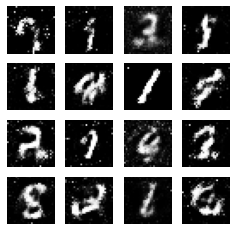

In [12]:
iterations = 20000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval)